# FDTD tidy3d

gdsfactory simulation plugin for tidy3d
[tidy3D is a FDTD web based software](https://simulation.cloud/)

## Materials

tidy3d provides you with a material database of dispersive materials.

In [1]:
# basic ipython configuration (reload source code automatically and plots inline)
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tidy3d as td
from tidy3d import web

import gdsfactory as gf
import gdsfactory.simulation.gtidy3d as gt
import gdsfactory.simulation as sim

[00:17:12] INFO     Using client version: 1.7.1                                                      ]8;id=885506;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/__init__.py\__init__.py]8;;\:]8;id=175759;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/__init__.py#95\95]8;;\

2022-11-07 00:17:13.009 | INFO     | gdsfactory.config:<module>:45 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.54.0


2022-11-07 00:17:14.199 | INFO     | gdsfactory.simulation.gtidy3d:<module>:54 - Tidy3d '1.7.1' installed at ['/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d']


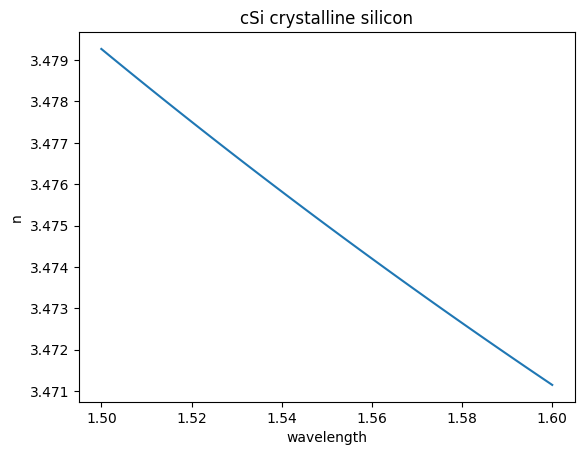

In [2]:
nm = 1e-3
wavelength = np.linspace(1500, 1600) * nm
f = td.C_0 / wavelength
eps_complex = gt.materials.material_library["cSi"]["Li1993_293K"].eps_model(f)
n, k = td.Medium.eps_complex_to_nk(eps_complex)
plt.plot(wavelength, n)
plt.title("cSi crystalline silicon")
plt.xlabel("wavelength")
plt.ylabel("n")

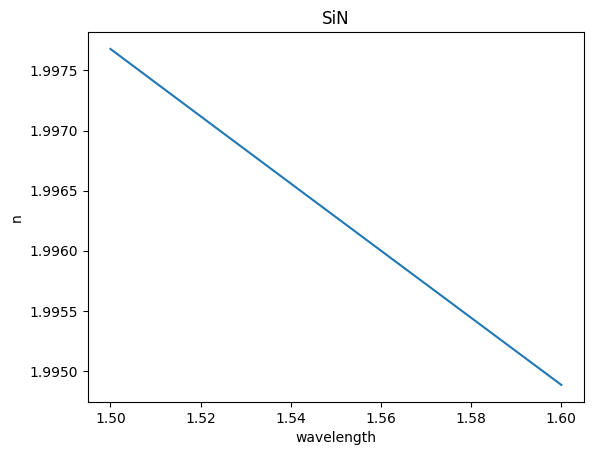

In [3]:
eps_complex = gt.materials.material_library["Si3N4"]["Luke2015"].eps_model(f)
n, k = td.Medium.eps_complex_to_nk(eps_complex)
plt.plot(wavelength, n)
plt.title("SiN")
plt.xlabel("wavelength")
plt.ylabel("n")

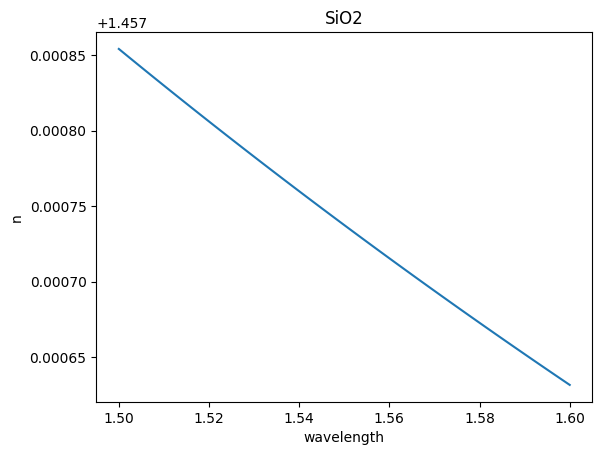

In [4]:
eps_complex = gt.materials.material_library["SiO2"]["Horiba"].eps_model(f)
n, k = td.Medium.eps_complex_to_nk(eps_complex)
plt.plot(wavelength, n)
plt.title("SiO2")
plt.xlabel("wavelength")
plt.ylabel("n")

## get_simulation

You can run `get_simulation` to convert a gdsfactory planar Component into a tidy3d simulation and make sure the simulation looks correct before running it

`get_simulation` also has a `plot_modes` option so you can make sure you are monitoring the desired mode.

### 2D

2D planar simulations run faster than 3D. When running in 2D we don't consider the component thickness in the z dimension

2022-11-07 00:17:14.891 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0, zmax = 0


[00:17:14] WARNING  Structure at structures[1] has bounds that extend exactly to simulation       ]8;id=508495;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=384405;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#277\277]8;;\
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

           WARNING  Structure at structures[1] has bounds that extend exactly to simulation       ]8;id=942205;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=806330;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#277\277]8;;\
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

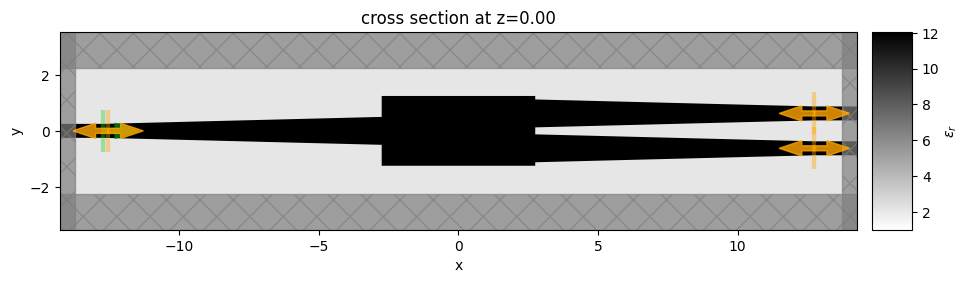

In [5]:
c = gf.components.mmi1x2()
s = gt.get_simulation(c, is_3d=False)
fig = gt.plot_simulation(s)

### 3D

By default all simulations run in 3D unless indicated otherwise with the `is_3d` argument.
3D simulations still run quite fast thanks to the GPU solver on the server side.

In [6]:
help(gt.get_simulation)

Help on cython_function_or_method in module gdsfactory.simulation.gtidy3d.get_simulation:

get_simulation(component: Union[str, Callable[..., gdsfactory.component.Component], gdsfactory.component.Component, Dict[str, Any]], port_extension: Optional[float] = 4.0, layer_stack: Optional[gdsfactory.tech.LayerStack] = None, thickness_pml: float = 1.0, xmargin: float = 0, ymargin: float = 0, xmargin_left: float = 0, xmargin_right: float = 0, ymargin_top: float = 0, ymargin_bot: float = 0, zmargin: float = 1.0, clad_material: str = 'sio2', port_source_name: str = 'o1', port_margin: float = 0.5, port_source_offset: float = 0.1, distance_source_to_monitors: float = 0.2, wavelength_start: float = 1.5, wavelength_stop: float = 1.6, wavelength_points: int = 50, plot_modes: bool = False, num_modes: int = 2, run_time_ps: float = 10.0, dispersive: bool = False, material_name_to_tidy3d_index: Dict[str, float] = {'si': 3.47, 'sio2': 1.44, 'sin': 2.0}, material_name_to_tidy3d_name: Dict[str, str] = {'si

2022-11-07 00:17:15.256 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


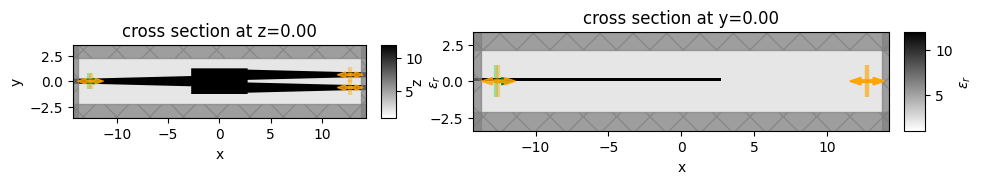

In [7]:
c = gf.components.mmi1x2()
s = gt.get_simulation(c)
fig = gt.plot_simulation(s)

2022-11-07 00:17:15.693 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


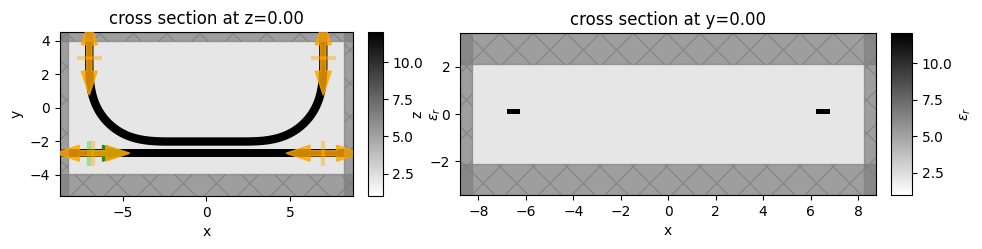

In [8]:
c = gf.components.coupler_ring()
s = gt.get_simulation(c)
fig = gt.plot_simulation(s)

2022-11-07 00:17:16.190 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


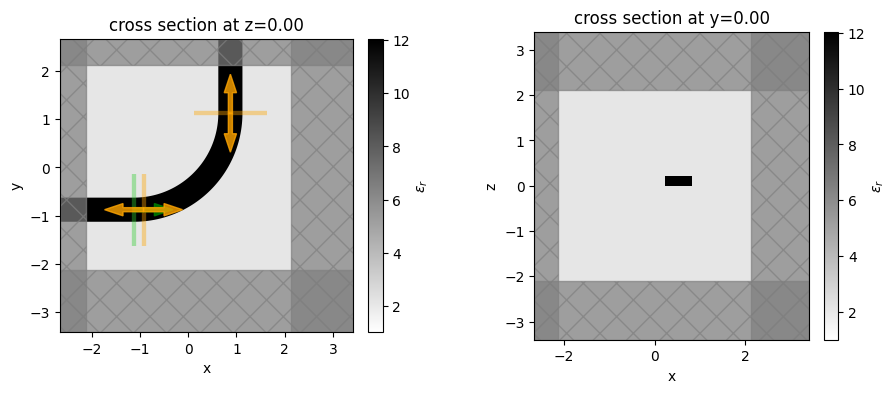

In [9]:
c = gf.components.bend_circular(radius=2)
s = gt.get_simulation(c)
fig = gt.plot_simulation(s)

2022-11-07 00:17:16.693 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


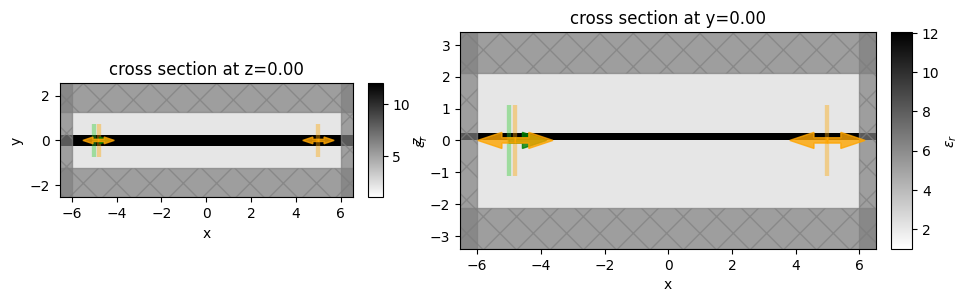

In [10]:
c = gf.components.straight()
s = gt.get_simulation(c)
fig = gt.plot_simulation(s)

## Sidewall angle

You can define the sidewall angle in degrees with respect to normal. Lets exaggerate the sidewall angle so we can clearly see it.

2022-11-07 00:17:17.341 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


Effective index of computed modes:  [[1.9480888 1.5390158]]


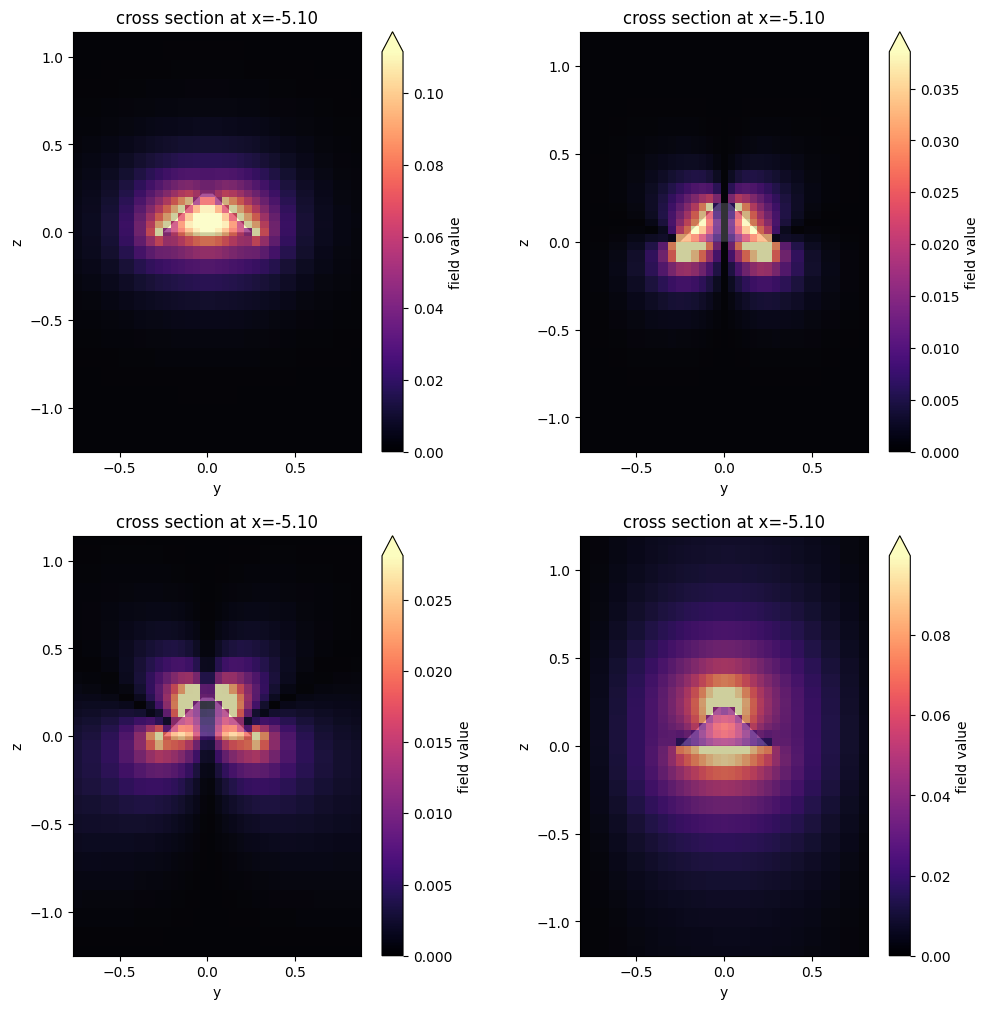

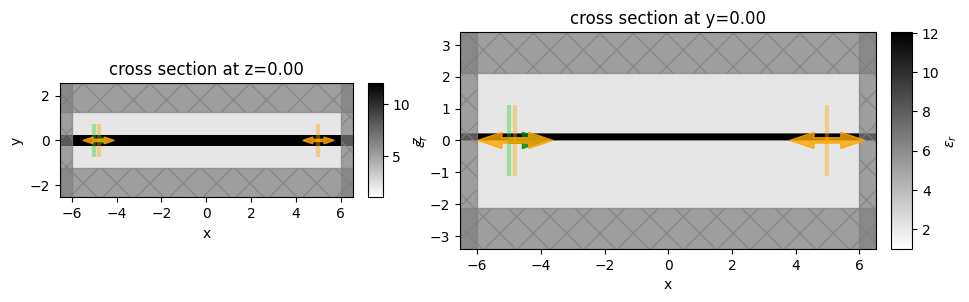

In [11]:
c = gf.components.straight()
s = gt.get_simulation(c, sidewall_angle_deg=45, plot_modes=True)
fig = gt.plot_simulation(s)

## Erosion / dilation

2022-11-07 00:17:19.295 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0, zmax = 0


[00:17:19] WARNING  Structure at structures[1] has bounds that extend exactly to simulation       ]8;id=122332;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=510968;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#277\277]8;;\
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

           WARNING  Structure at structures[1] has bounds that extend exactly to simulation       ]8;id=201901;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=1406;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#277\277]8;;\
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

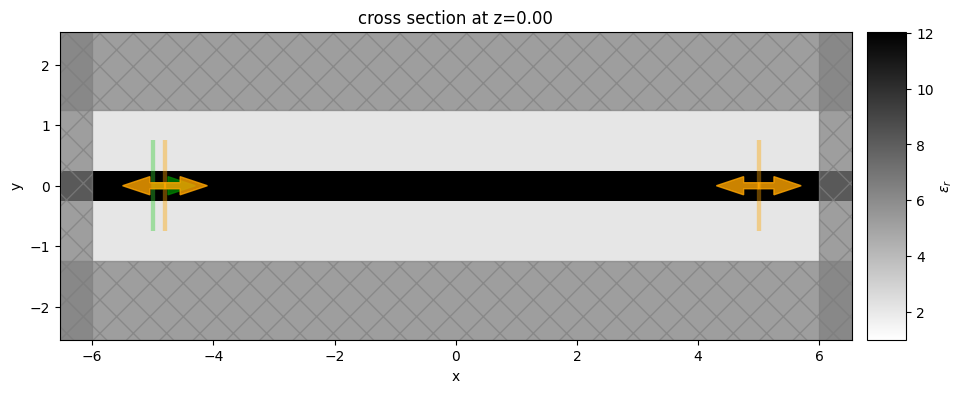

In [12]:
c = gf.components.straight()
s = gt.get_simulation(c, is_3d=False, dilation=0)
fig = gt.plot_simulation(s)

2022-11-07 00:17:19.617 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0, zmax = 0


           WARNING  Structure at structures[1] has bounds that extend exactly to simulation       ]8;id=301572;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=462656;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#277\277]8;;\
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

           WARNING  Structure at structures[1] has bounds that extend exactly to simulation       ]8;id=564910;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=104780;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#277\277]8;;\
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

           WARNING  Structure at structures[1] was detected as being less than half of a central  ]8;id=840968;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=957433;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#303\303]8;;\
                    wavelength from a PML on side y-min. To avoid inaccurate results, please                       
                    increase gap between any structures and PML or fully extend structure through                  
                    the pml.                                                                                       

           WARNING  Structure at structures[1] was detected as being less than half of a central  ]8;id=888712;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=757317;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#303\303]8;;\
                    wavelength from a PML on side y-max. To avoid inaccurate results, please                       
                    increase gap between any structures and PML or fully extend structure through                  
                    the pml.                                                                                       

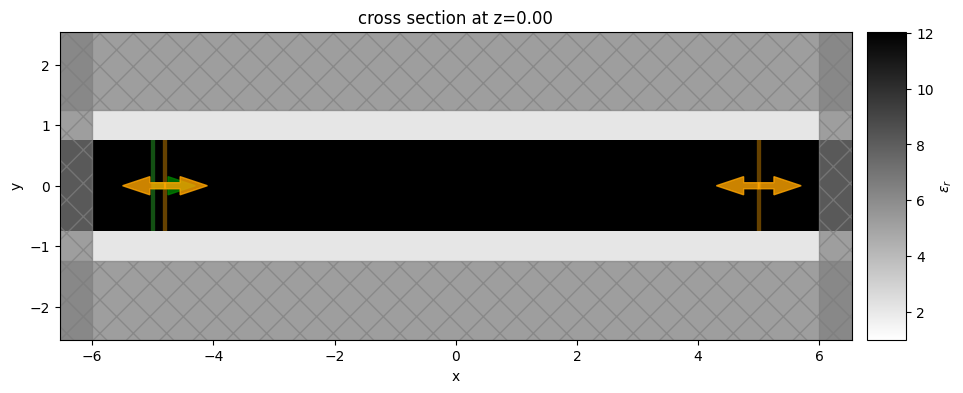

In [13]:
c = gf.components.straight()
s = gt.get_simulation(c, is_3d=False, dilation=0.5)
fig = gt.plot_simulation(s)

In [14]:
0.5 * 1.5

0.75

A `dilation = 0.5` makes a 0.5um waveguide 0.75um

In [15]:
0.5 * 0.8

0.4

A `dilation = -0.2` makes a 0.5um eroded down to 0.1um

In [16]:
0.2 * 0.5

0.1

2022-11-07 00:17:20.045 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0, zmax = 0


[00:17:20] WARNING  Structure at structures[1] has bounds that extend exactly to simulation       ]8;id=727773;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=29004;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#277\277]8;;\
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

           WARNING  Structure at structures[1] has bounds that extend exactly to simulation       ]8;id=103908;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=433598;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/components/simulation.py#277\277]8;;\
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

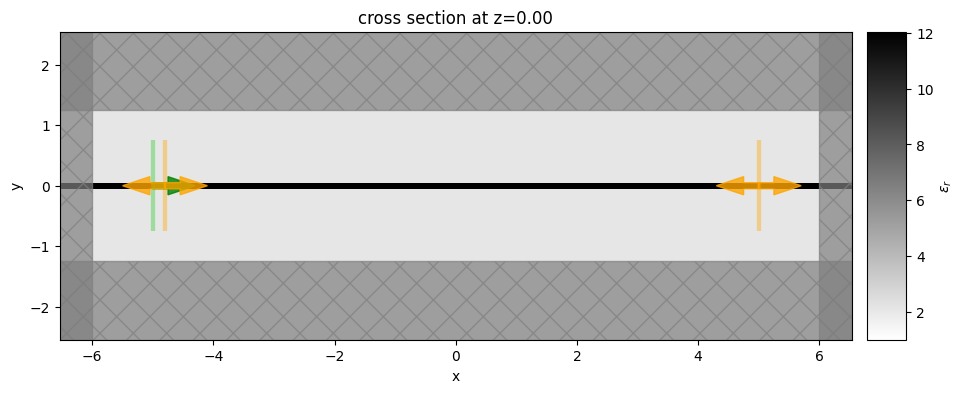

In [17]:
c = gf.components.straight()
s = gt.get_simulation(c, is_3d=False, dilation=-0.2)
fig = gt.plot_simulation(s)

## Plot source and monitor modes

2022-11-07 00:17:20.358 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


Effective index of computed modes:  [[2.4605424 1.7893229]]


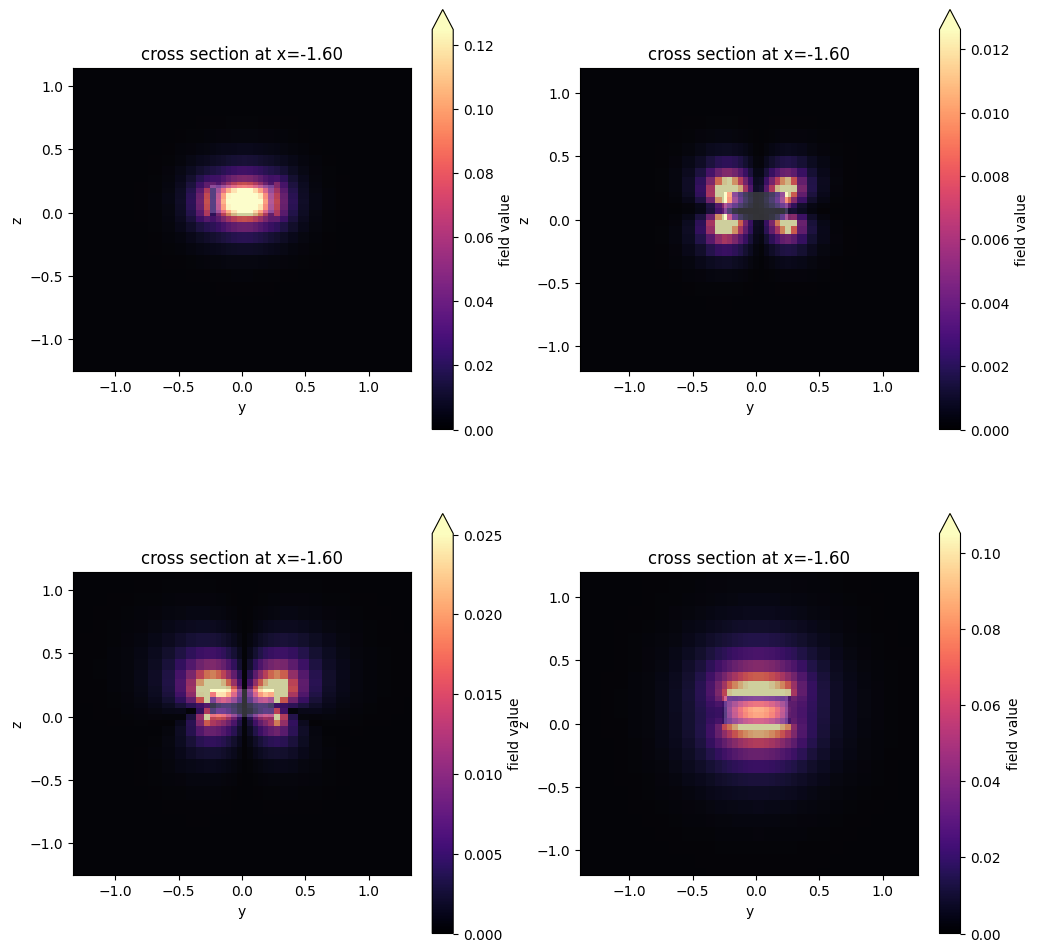

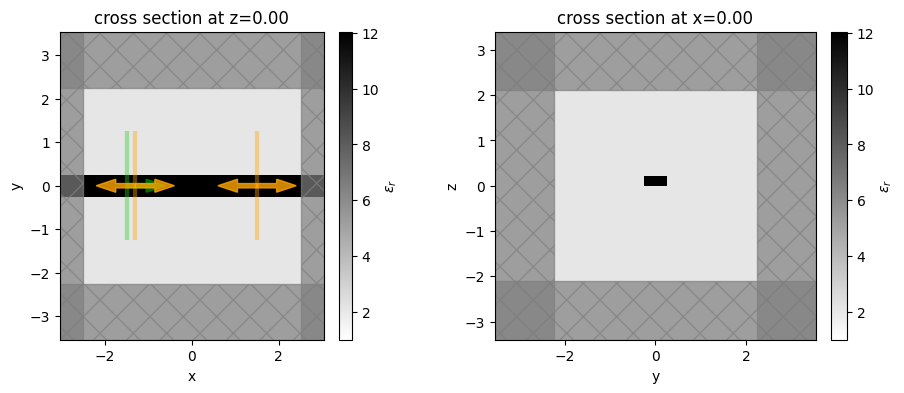

In [18]:
import numpy as np
import matplotlib.pyplot as plt

import tidy3d as td
from tidy3d import web
import gdsfactory as gf
import gdsfactory.simulation.gtidy3d as gt

c = gf.components.straight(length=3)
sim = gt.get_simulation(c, plot_modes=True, port_margin=1, ymargin=1)
fig = gt.plot_simulation_xz(sim)

2022-11-07 00:17:22.429 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


2022-11-07 00:17:22.431 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (3, 0), 3.47, index = 3.470, thickness = 0.09, zmin = 0.0, zmax = 0.09


[00:17:22] WARNING  Mode field at frequency index 0, mode index 1 does not decay at the plane    ]8;id=136213;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/plugins/mode/mode_solver.py\mode_solver.py]8;;\:]8;id=966613;file:///usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/tidy3d/plugins/mode/mode_solver.py#334\334]8;;\
                    boundaries.                                                                                    

Effective index of computed modes:  [[2.589958  2.1446679]]


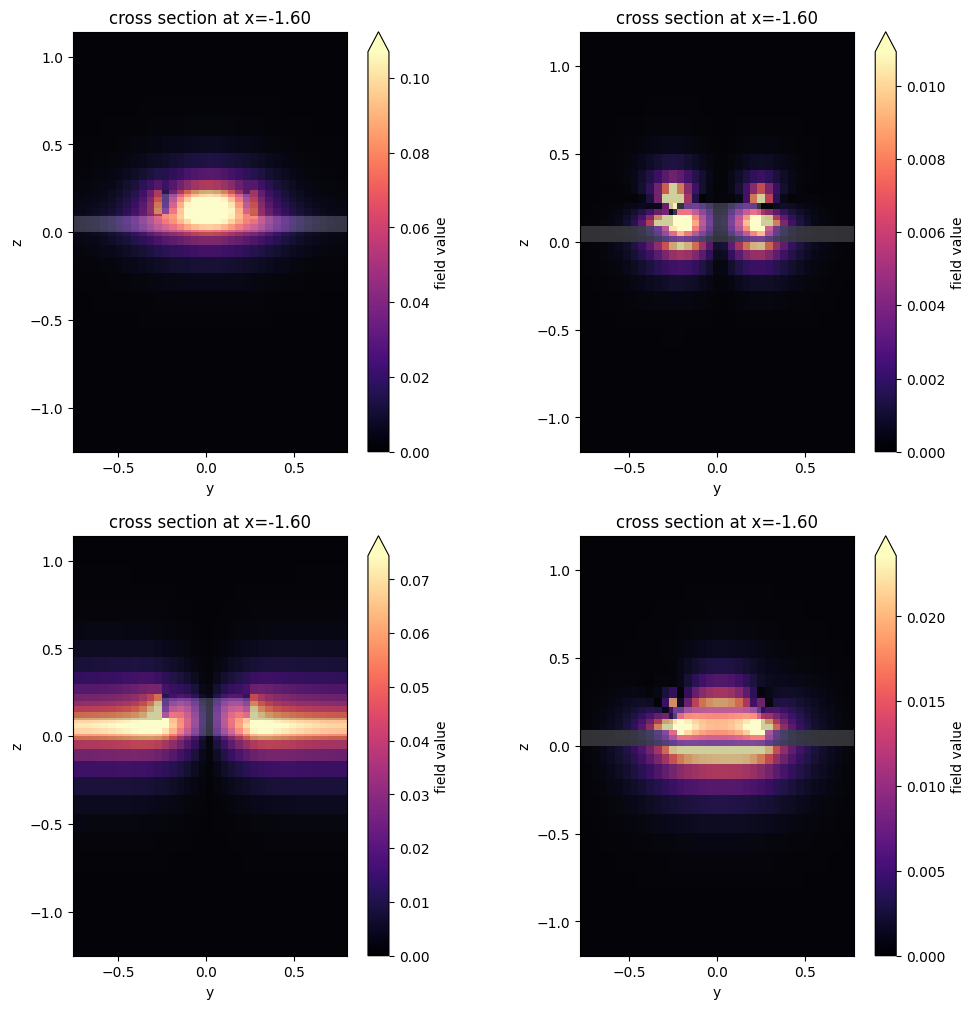

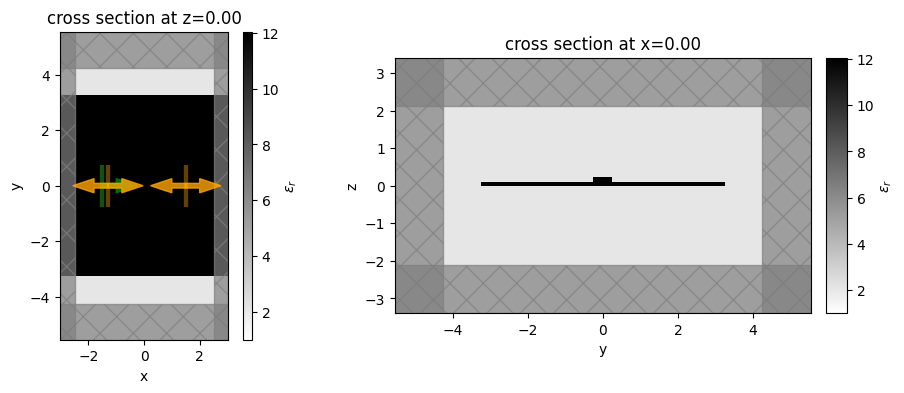

In [19]:
c = gf.components.straight_rib(length=3)
sim = gt.get_simulation(c, plot_modes=True)
fig = gt.plot_simulation_xz(sim)

2022-11-07 00:17:24.423 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


2022-11-07 00:17:24.426 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (34, 0), 2.0, index = 2.000, thickness = 0.35000000000000003, zmin = 0.32, zmax = 0.67


Effective index of computed modes:  [[2.4070396 1.7582394]]


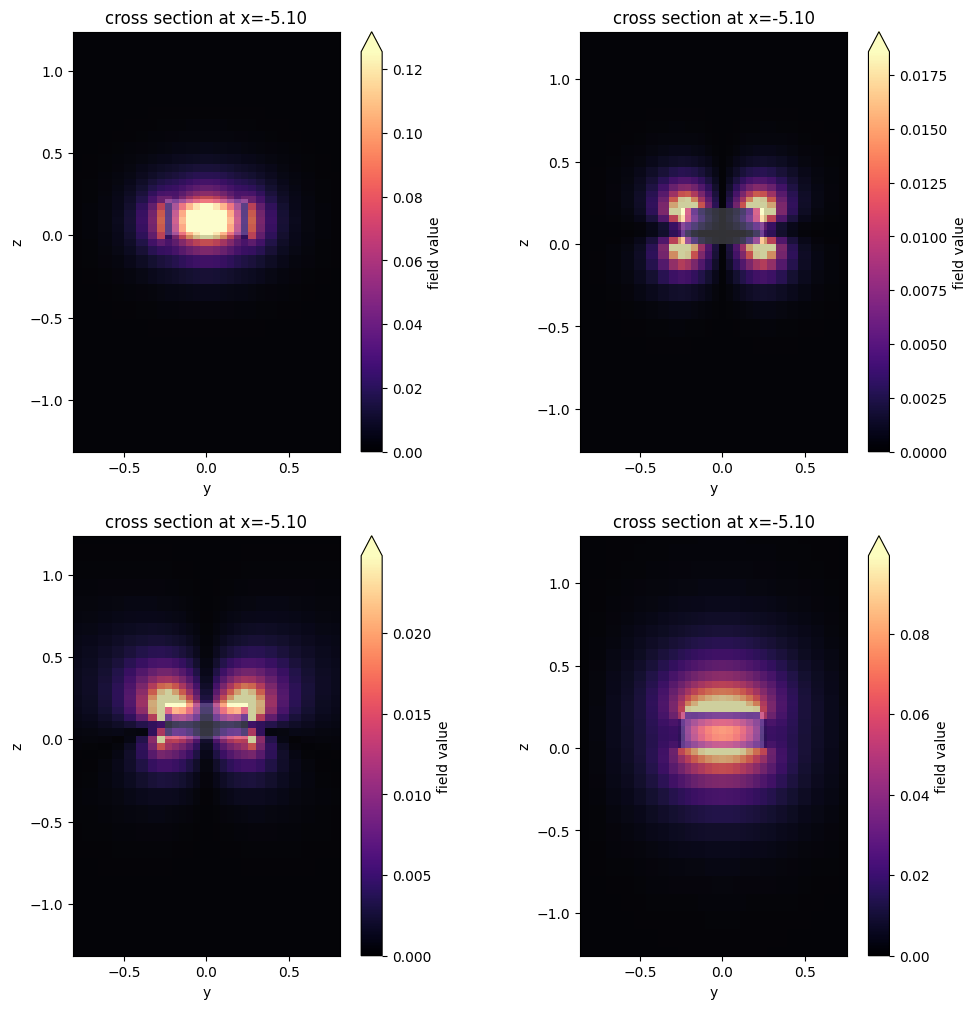

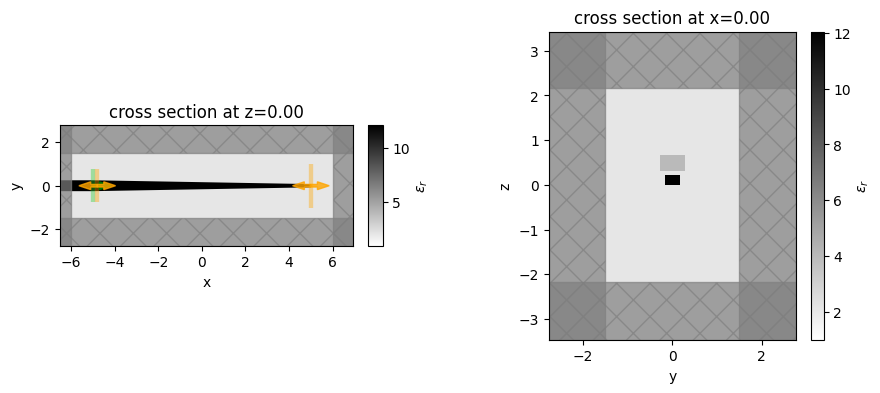

In [20]:
import numpy as np
import matplotlib.pyplot as plt

import tidy3d as td
from tidy3d import web

import gdsfactory as gf
import gdsfactory.simulation.gtidy3d as gt
import gdsfactory.simulation as sim
from gdsfactory.components.taper import taper_sc_nc

c = taper_sc_nc(length=10)
s = gt.get_simulation(c, plot_modes=True)
fig = gt.plot_simulation_xz(s)

Lets make sure the mode also looks correct on the Nitride side

2022-11-07 00:17:26.603 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


2022-11-07 00:17:26.605 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (34, 0), 2.0, index = 2.000, thickness = 0.35000000000000003, zmin = 0.32, zmax = 0.67


Effective index of computed modes:  [[1.6168239 1.5330055]]


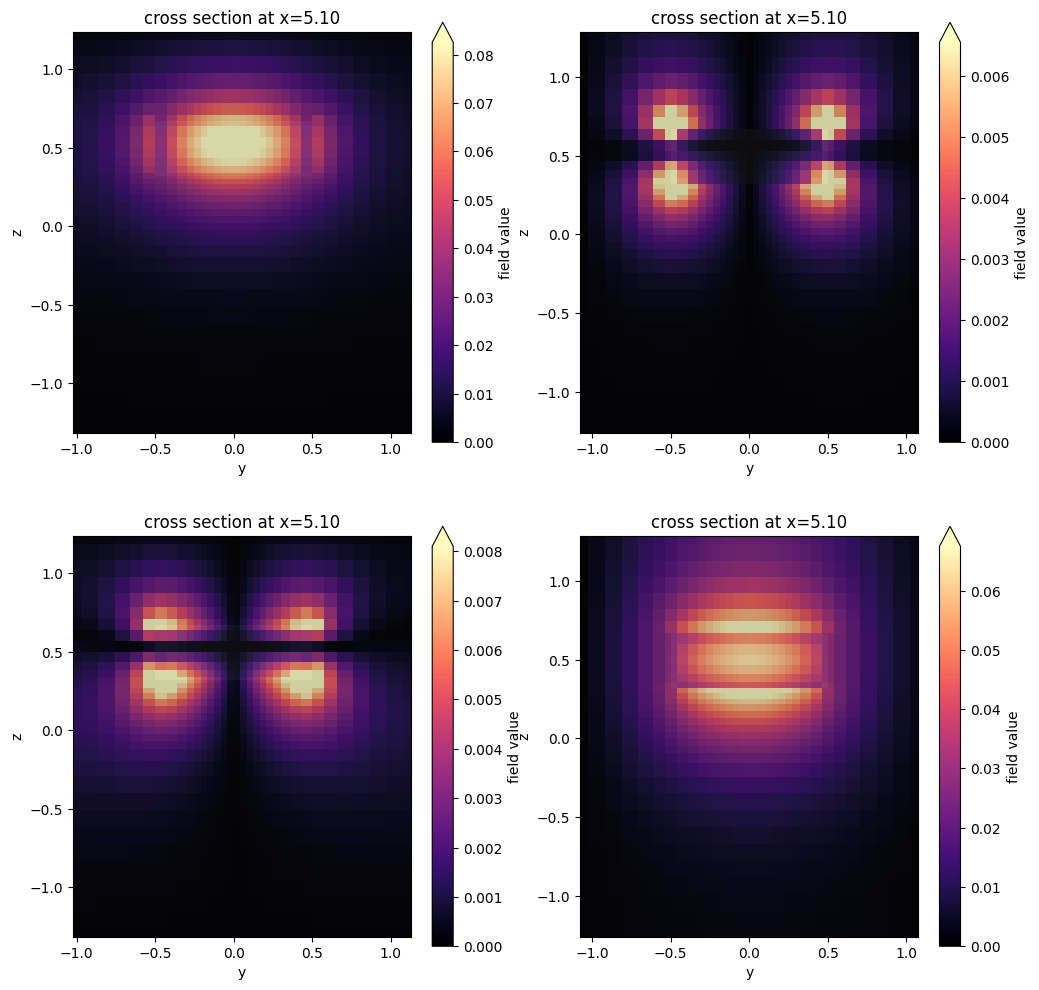

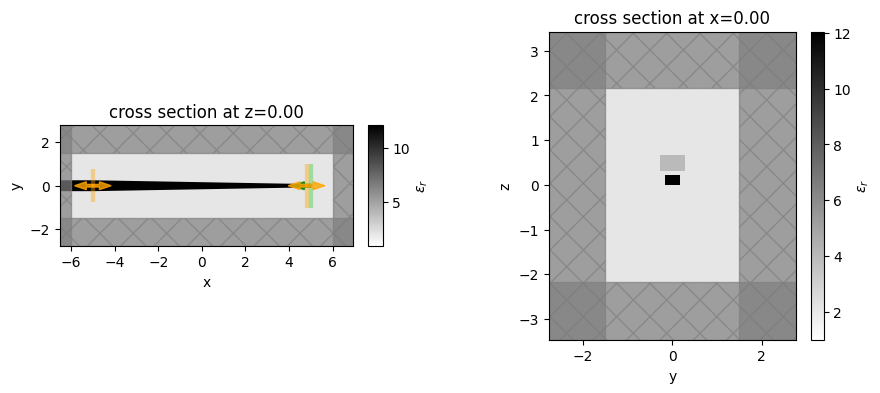

In [21]:
c = taper_sc_nc(length=10)
s = gt.get_simulation(c, port_source_name="o2", plot_modes=True)
fig = gt.plot_simulation_xz(s)

2022-11-07 00:17:28.603 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


bend_euler


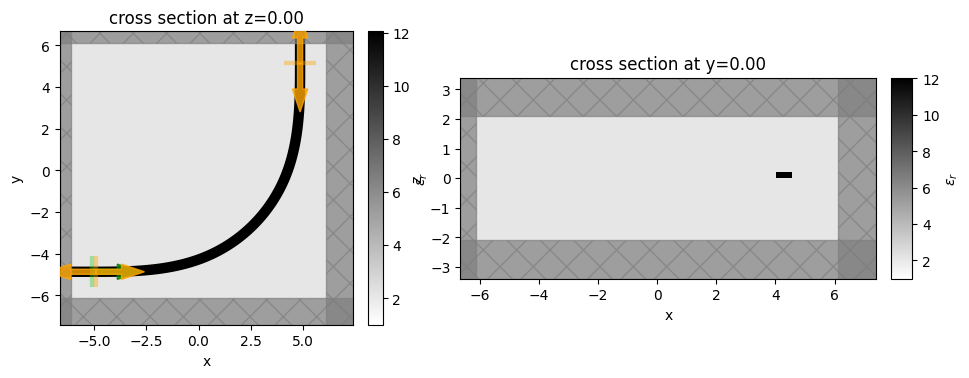

2022-11-07 00:17:29.095 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


bend_s


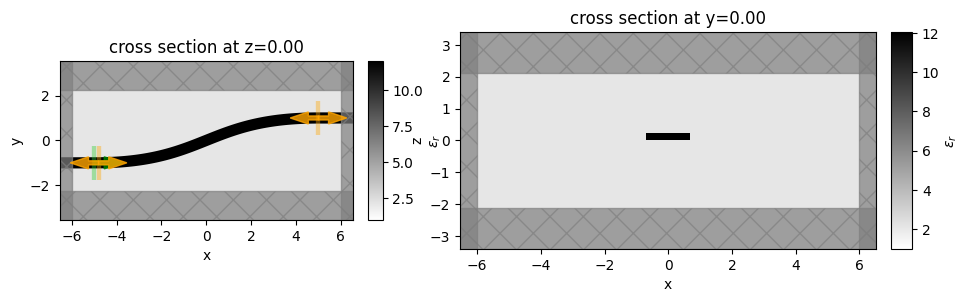

2022-11-07 00:17:29.558 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


coupler


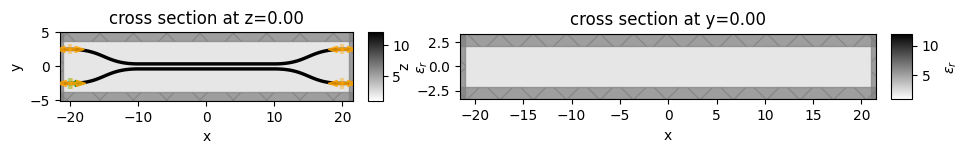

2022-11-07 00:17:29.980 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


coupler_ring


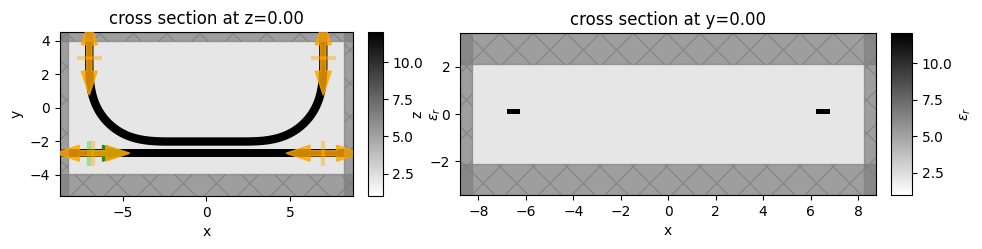

2022-11-07 00:17:30.699 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


2022-11-07 00:17:30.702 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (2, 0), 3.47, index = 3.470, thickness = 0.15, zmin = 0.0, zmax = 0.15


crossing


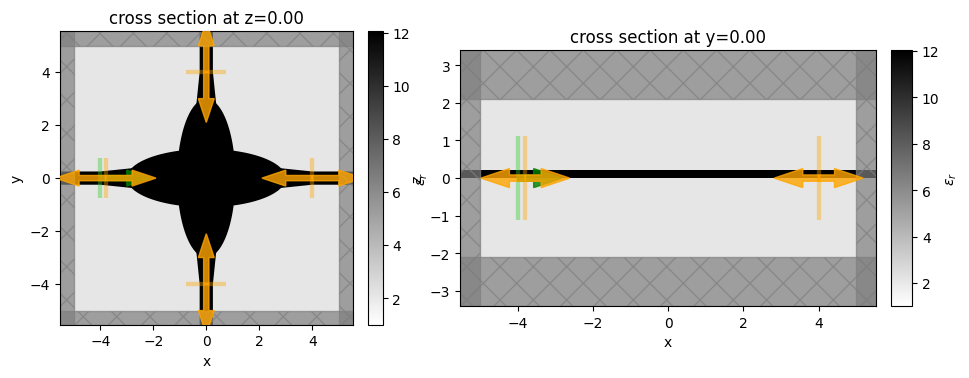

2022-11-07 00:17:31.181 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


mmi1x2


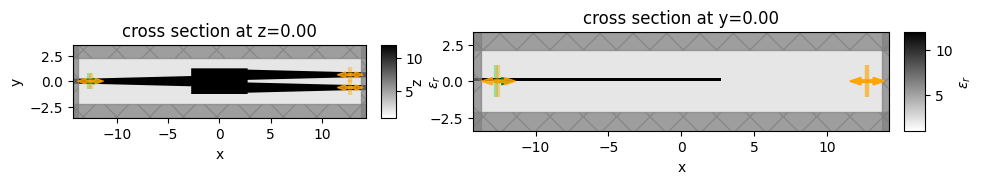

2022-11-07 00:17:31.571 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


mmi2x2


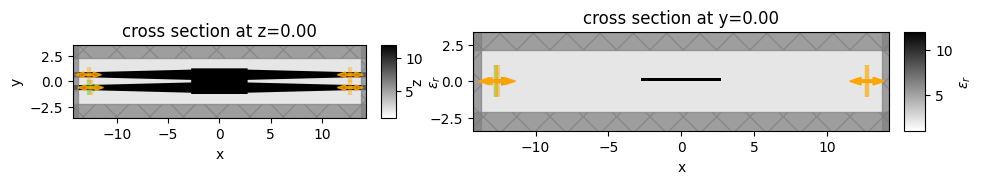

2022-11-07 00:17:31.954 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


taper


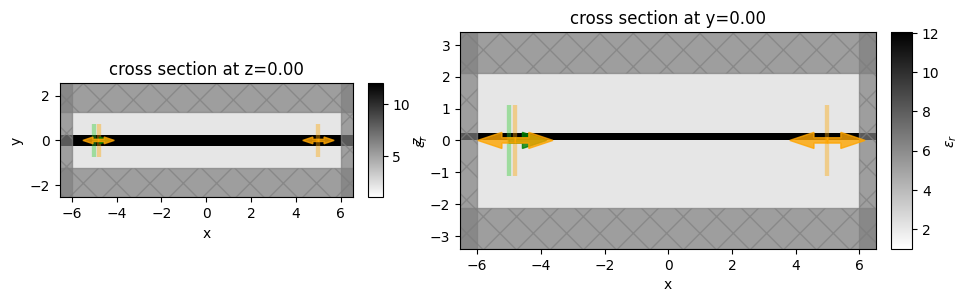

2022-11-07 00:17:32.390 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


straight


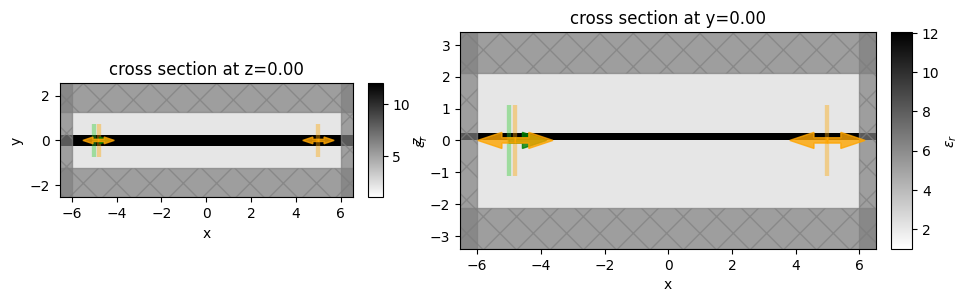

In [22]:
components = [
    "bend_euler",
    "bend_s",
    "coupler",
    "coupler_ring",
    "crossing",
    "mmi1x2",
    "mmi2x2",
    "taper",
    "straight",
]

for component_name in components:
    print(component_name)
    plt.figure()
    c = gf.components.cells[component_name]()
    s = gt.get_simulation(c)
    fig = gt.plot_simulation(s)

## write_sparameters

You can write Sparameters from a simulation as well as a group of simulations in parallel.

Each Sparameter runs on a different thread as it needs to monitor each job sent to the tidy3d server.

```python
c = gf.components.straight()
s = gt.get_sparameters(c)
```

```python
for component_name, component_factory in gf.components._factory_passives.items():
    c = component_factory()
    s = gt.get_sparameters(c)

```

2022-11-07 00:17:32.867 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


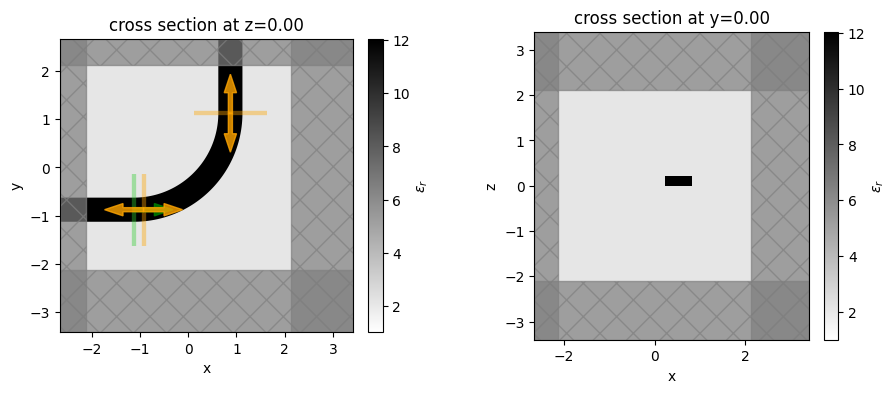

In [23]:
c = gf.components.bend_circular(radius=2)
s = gt.get_simulation(c)
fig = gt.plot_simulation(s)

For a 2 port reciprocal passive component you can always assume `s21 = s12`

Another approximation you can make for planar devices is that `s11 = s22`, which saves 1 extra simulation

This approximation only works well for straight and bends

we call this `1x1` port symmetry

2022-11-07 00:17:33.579 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters:write_sparameters:161 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/bend_circular_radius2_c3ff7345.npz')


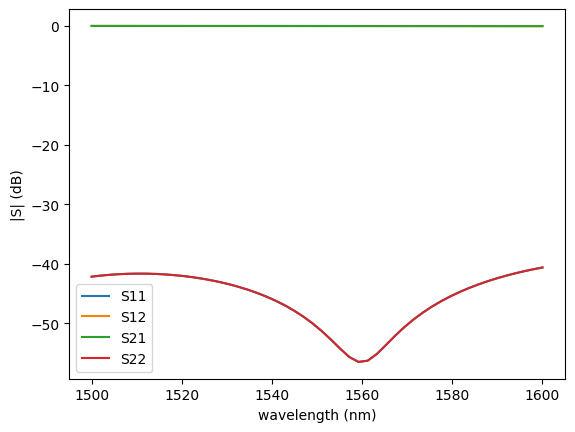

In [24]:
df = gt.write_sparameters_1x1(c)
sim.plot.plot_sparameters(df)

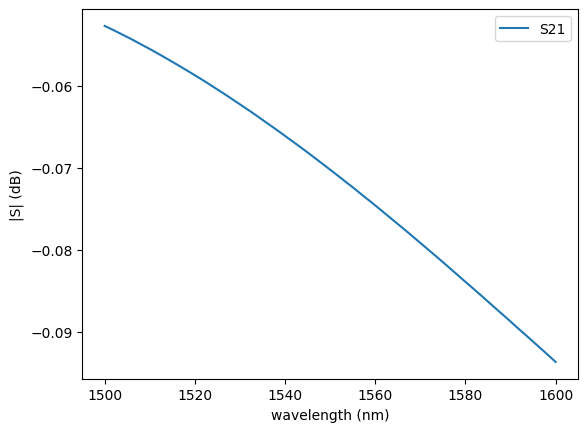

In [25]:
sim.plot.plot_sparameters(df, keys=("o2@0,o1@0",))

2022-11-07 00:17:33.937 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation:get_simulation:285 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


Effective index of computed modes:  [[2.4603941 1.7641193]]


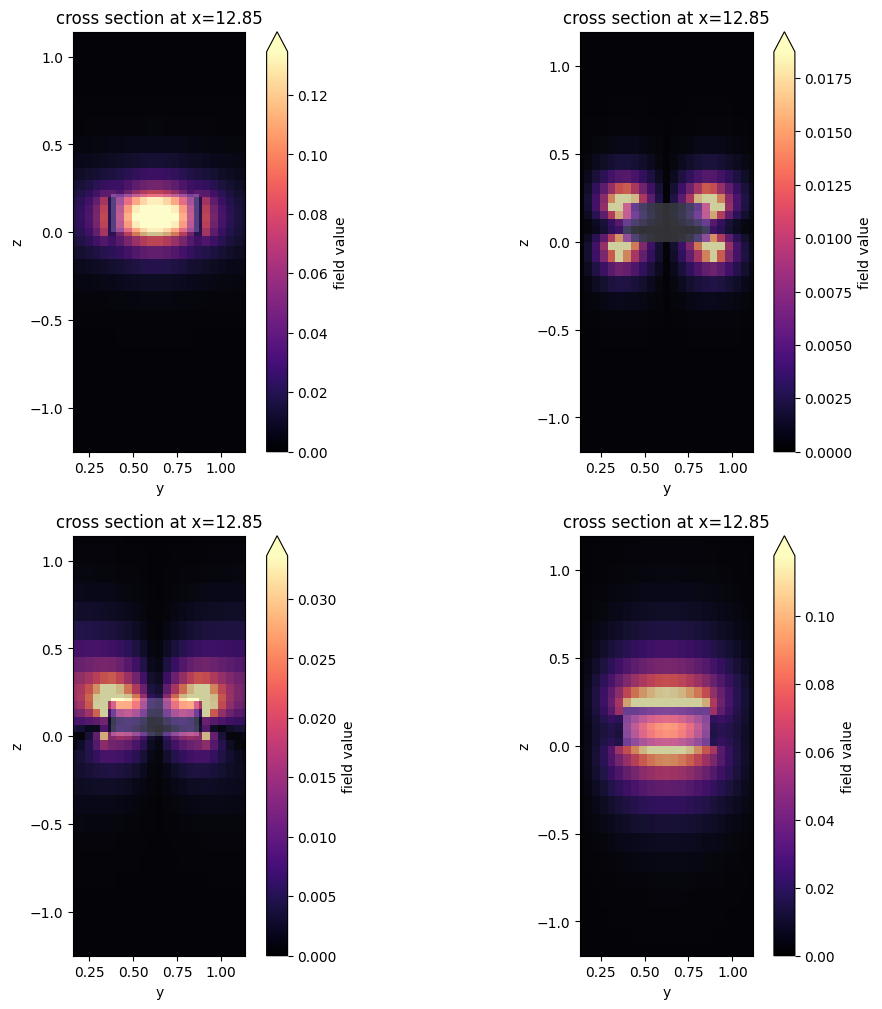

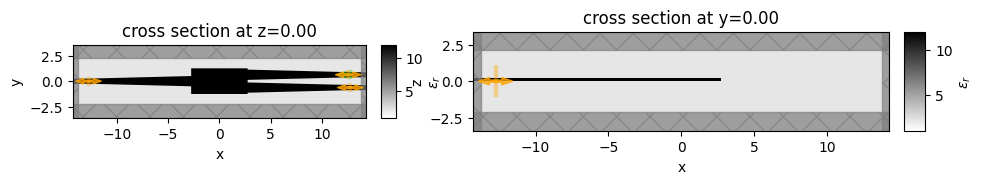

In [26]:
import gdsfactory as gf
import gdsfactory.simulation.gtidy3d as gt

c = gf.components.mmi1x2()
s = gt.get_simulation(c, plot_modes=True, port_margin=0.2, port_source_name="o2")
fig = gt.plot_simulation(s, y=0)  # see input

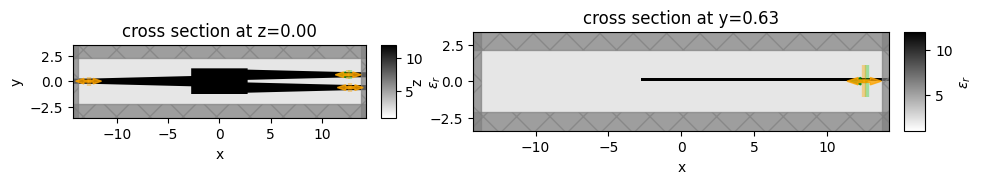

In [27]:
fig = gt.plot_simulation(s, y=0.63)  # see output

In [28]:
# df = gt.write_sparameters(c, wavelength_start=1.5, wavelength_stop=1.6, grid_spec=td.GridSpec.uniform(dl=50*nm))
# df = gt.write_sparameters(c)
# df = gt.write_sparameters(c, wavelength_start=1.520, wavelength_stop=1.580, port_margin=0.6, ymargin=2)
# df = gt.write_sparameters(c, wavelength_start=1.520, wavelength_stop=1.580, port_margin=0.9)
df = gt.write_sparameters(c)

2022-11-07 00:17:36.088 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters:write_sparameters:161 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_c3ff7345.npz')


In [29]:
import gdsfactory.simulation as sim

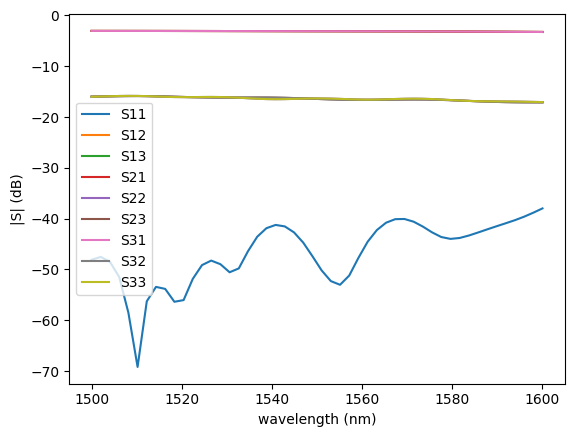

In [30]:
sim.plot.plot_sparameters(df)

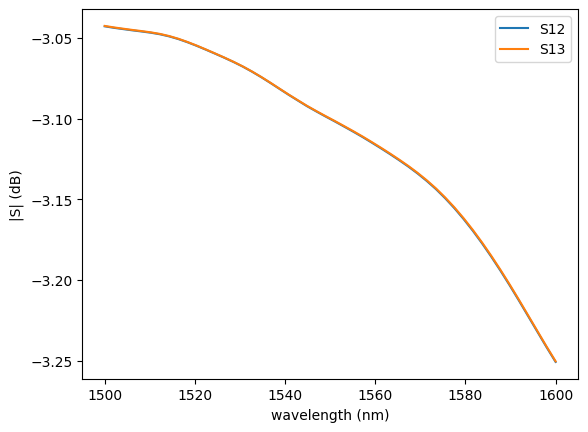

In [31]:
sim.plot.plot_sparameters(df, keys=("o1@0,o2@0", "o1@0,o3@0"))

## write_sparameters_batch

You can also send a batch of component simulations in parallel to the tidy3d server.


In [32]:
jobs = [dict(component=gf.c.straight(length=1.11 + i)) for i in [1, 2]]
dfs = gt.write_sparameters_batch_1x1(jobs)

2022-11-07 00:17:36.544 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters:write_sparameters:161 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/straight_length2p110000_b5b2ce7b_c3ff7345.npz')


2022-11-07 00:17:36.545 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters:write_sparameters:161 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/straight_length3p110000_e3d7b292_c3ff7345.npz')


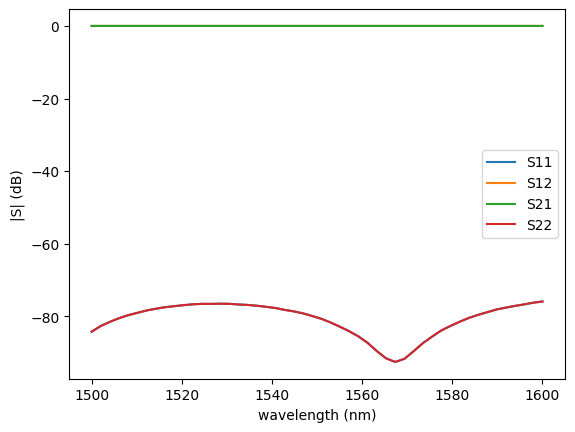

In [33]:
df1 = dfs[0]
sim.plot.plot_sparameters(df1)

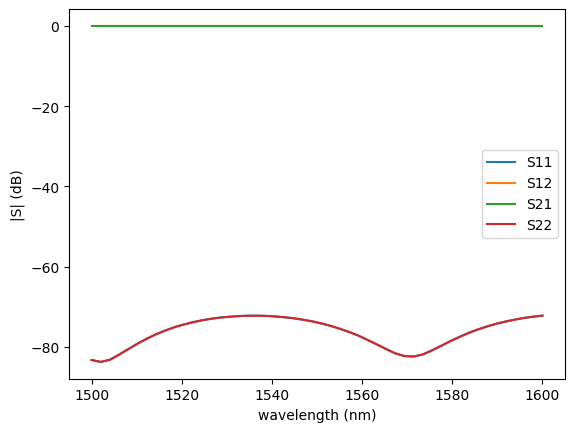

In [34]:
df2 = dfs[1]
sim.plot.plot_sparameters(df2)

## get_simulation_grating_coupler

You can also expand the planar component simulations to simulate an out-of-plane grating coupler.

The following simulations run in 2D but can also run in 3D.

In [35]:
help(gt.get_simulation_grating_coupler)

Help on function get_simulation_grating_coupler in module gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:

get_simulation_grating_coupler(component: gdsfactory.component.Component, port_extension: Optional[float] = 15.0, layer_stack: Optional[gdsfactory.tech.LayerStack] = None, thickness_pml: float = 1.0, xmargin: float = 0, ymargin: float = 0, xmargin_left: float = 0, xmargin_right: float = 0, ymargin_top: float = 0, ymargin_bot: float = 0, zmargin: float = 1.0, clad_material: str = 'sio2', box_material: str = 'sio2', box_thickness: float = 2.0, substrate_material: str = 'si', port_waveguide_name: str = 'o1', port_margin: float = 0.5, port_waveguide_offset: float = 0.1, distance_source_to_monitors: float = 0.2, wavelength: Optional[float] = 1.55, wavelength_start: float = 1.2, wavelength_stop: float = 1.8, wavelength_points: int = 256, plot_modes: bool = False, num_modes: int = 2, run_time_ps: float = 10.0, fiber_port_name: str = 'vertical_te', fiber_xoffset: float = 0, 

In [36]:
import gdsfactory as gf
import gdsfactory.simulation.gtidy3d as gt
import numpy as np
import matplotlib.pyplot as plt

2022-11-07 00:17:37.018 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:get_simulation_grating_coupler:339 - Add (2, 0), 3.47, index = 3.470, thickness = 0.15, zmin = 0.0, zmax = 0.15


2022-11-07 00:17:37.021 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:get_simulation_grating_coupler:339 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


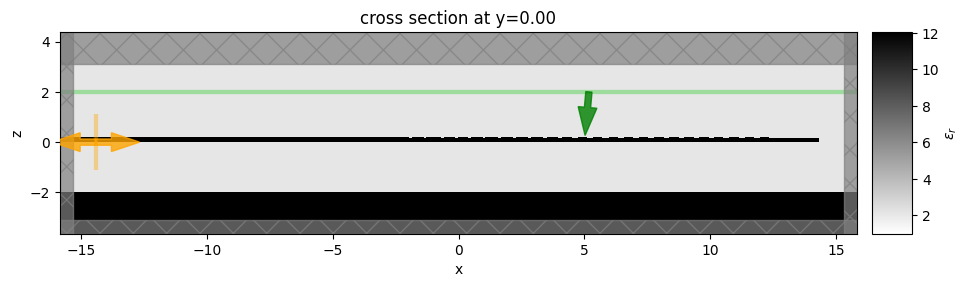

In [37]:
c = (
    gf.components.grating_coupler_elliptical_lumerical()
)  # inverse design grating apodized
fiber_angle_deg = 5
s = gt.get_simulation_grating_coupler(
    c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=0
)
f = gt.plot_simulation(s)

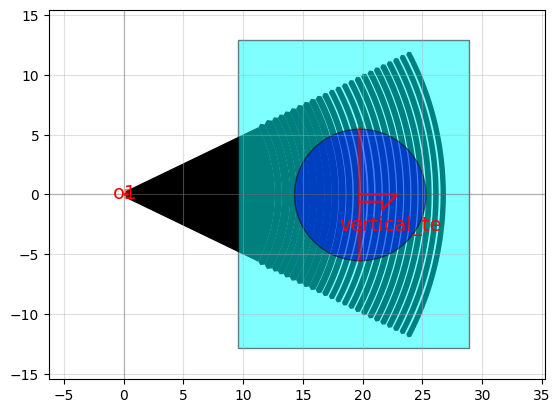

In [38]:
f = c.plot()

Lets compare the xtolerance of a constant pitch vs an apodized grating.

We run simulations in 2D for faster.

Lets simulate 2 different grating couplers:

- apodized inverse design example from lumerical website (5 degrees fiber angle)
- constant pitch grating from gdsfactory generic PDK (20 degrees fiber angle)

2022-11-07 00:17:37.893 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:get_simulation_grating_coupler:339 - Add (2, 0), 3.47, index = 3.470, thickness = 0.15, zmin = 0.0, zmax = 0.15


2022-11-07 00:17:37.895 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:get_simulation_grating_coupler:339 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


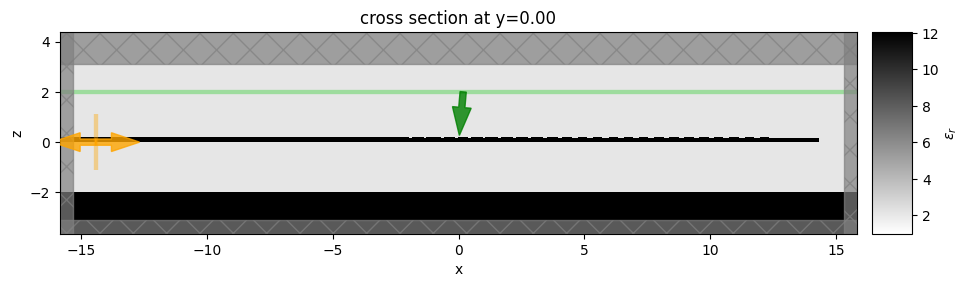

In [39]:
sim = gt.get_simulation_grating_coupler(
    c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=-5
)
f = gt.plot_simulation(sim)

2022-11-07 00:17:38.306 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:get_simulation_grating_coupler:339 - Add (2, 0), 3.47, index = 3.470, thickness = 0.15, zmin = 0.0, zmax = 0.15


2022-11-07 00:17:38.312 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:get_simulation_grating_coupler:339 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


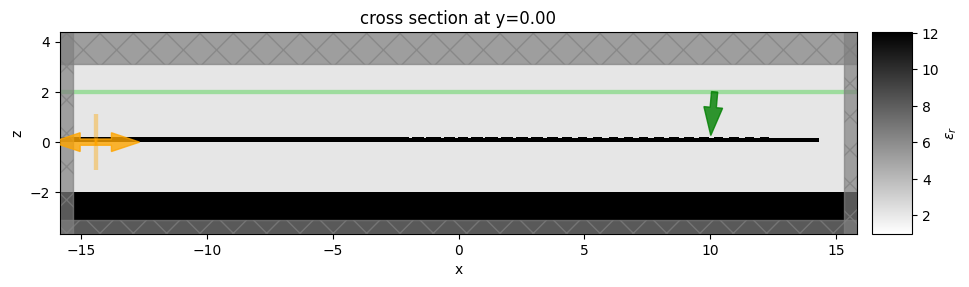

In [40]:
sim = gt.get_simulation_grating_coupler(
    c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=+5
)
f = gt.plot_simulation(sim)

In [41]:
offsets = np.arange(-5, 6, 5)

In [42]:
jobs = [
    dict(
        component=c,
        is_3d=False,
        fiber_angle_deg=fiber_angle_deg,
        fiber_xoffset=fiber_xoffset,
    )
    for fiber_xoffset in offsets
]
dfs = gt.write_sparameters_grating_coupler_batch(jobs)

2022-11-07 00:17:38.779 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_8de6986b.npz')


2022-11-07 00:17:38.780 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_51afdab7.npz')


2022-11-07 00:17:38.780 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_1aa2deeb.npz')


In [43]:
import numpy as np

log = lambda x: 20 * np.log10(x)

2022-11-07 00:17:38.851 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_1aa2deeb.npz')


2022-11-07 00:17:38.871 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_8de6986b.npz')


2022-11-07 00:17:38.874 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_51afdab7.npz')


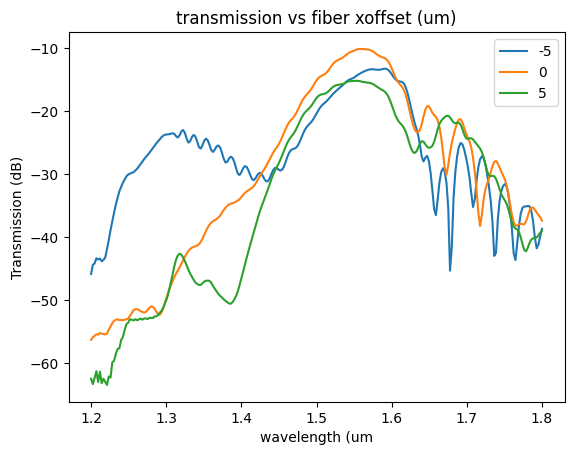

In [44]:
for offset in offsets:
    sp = gt.write_sparameters_grating_coupler(
        c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=offset
    )
    plt.plot(
        sp["wavelengths"], 20 * np.log10(np.abs(sp["o2@0,o1@0"])), label=str(offset)
    )

plt.xlabel("wavelength (um")
plt.ylabel("Transmission (dB)")
plt.title("transmission vs fiber xoffset (um)")
plt.legend()

In [45]:
fiber_angles = [3, 5, 7]
jobs = [
    dict(component=c, is_3d=False, fiber_angle_deg=fiber_angle_deg)
    for fiber_angle_deg in fiber_angles
]
dfs = gt.write_sparameters_grating_coupler_batch(jobs)

2022-11-07 00:17:39.117 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_e3ac5bee.npz')


2022-11-07 00:17:39.118 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_0b6befc7.npz')


2022-11-07 00:17:39.118 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_cbcef604.npz')


2022-11-07 00:17:39.152 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_e3ac5bee.npz')


2022-11-07 00:17:39.168 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_cbcef604.npz')


2022-11-07 00:17:39.173 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_9d85a0c6_0b6befc7.npz')


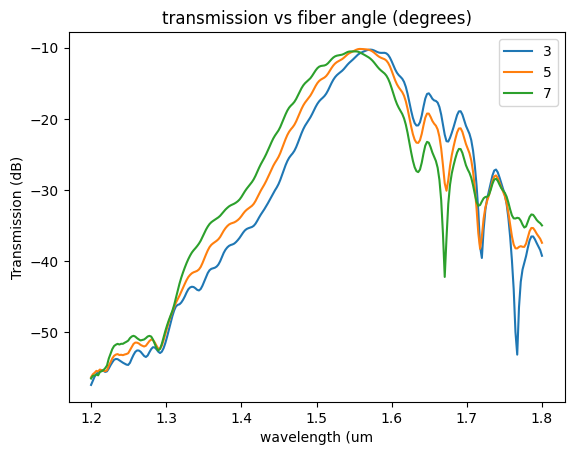

In [46]:
for fiber_angle_deg in fiber_angles:
    sp = gt.write_sparameters_grating_coupler(
        c, is_3d=False, fiber_angle_deg=fiber_angle_deg
    )
    plt.plot(
        sp["wavelengths"],
        20 * np.log10(np.abs(sp["o2@0,o1@0"])),
        label=str(fiber_angle_deg),
    )

plt.xlabel("wavelength (um")
plt.ylabel("Transmission (dB)")
plt.title("transmission vs fiber angle (degrees)")
plt.legend()

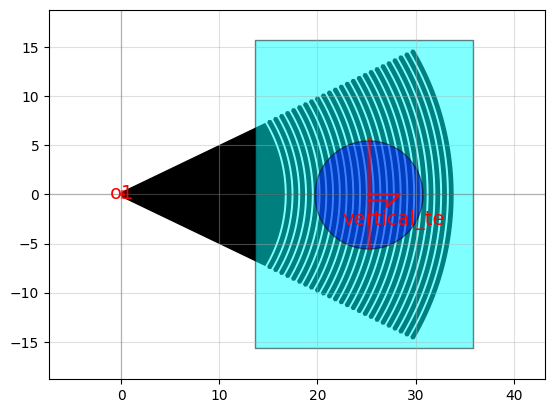

In [47]:
c = gf.components.grating_coupler_elliptical_arbitrary(
    widths=[0.343] * 25, gaps=[0.345] * 25
)
f = c.plot()

2022-11-07 00:17:39.635 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:get_simulation_grating_coupler:339 - Add (2, 0), 3.47, index = 3.470, thickness = 0.15, zmin = 0.0, zmax = 0.15


2022-11-07 00:17:39.638 | DEBUG    | gdsfactory.simulation.gtidy3d.get_simulation_grating_coupler:get_simulation_grating_coupler:339 - Add (1, 0), 3.47, index = 3.470, thickness = 0.22, zmin = 0.0, zmax = 0.22


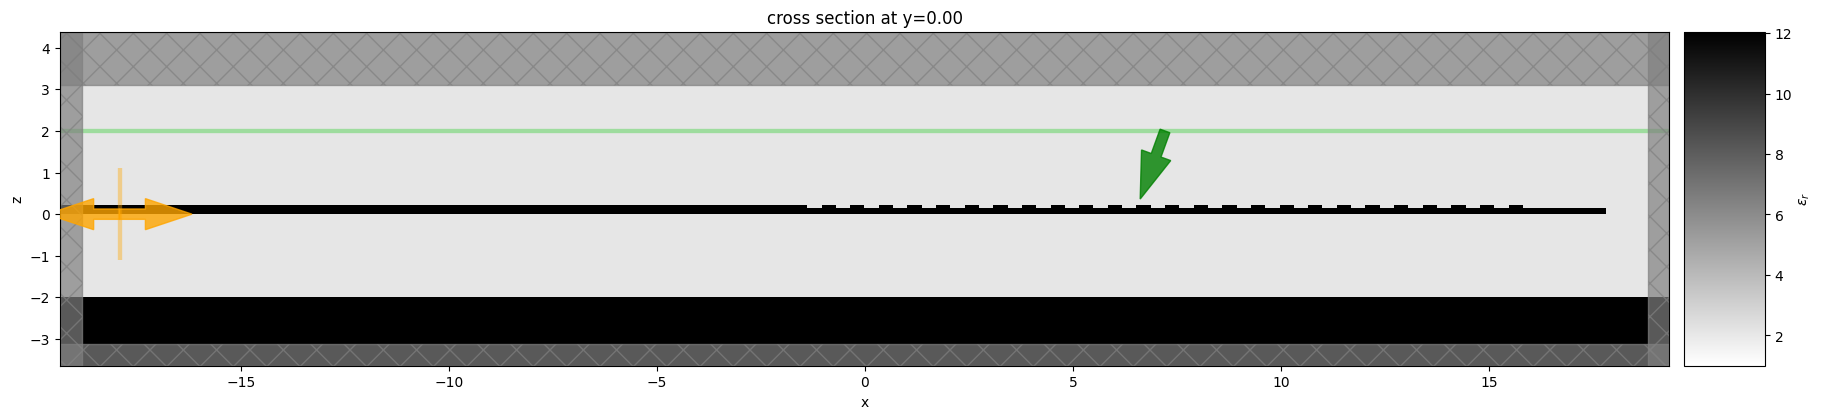

In [48]:
fiber_angle_deg = 20
sim = gt.get_simulation_grating_coupler(
    c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=0
)
f = gt.plot_simulation(sim, figsize=(22, 8))

In [49]:
offsets = np.arange(-10, 11, 5)
offsets

array([-10,  -5,   0,   5,  10])

In [50]:
jobs = [
    dict(
        component=c,
        is_3d=False,
        fiber_angle_deg=fiber_angle_deg,
        fiber_xoffset=fiber_xoffset,
    )
    for fiber_xoffset in offsets
]
dfs = gt.write_sparameters_grating_coupler_batch(jobs)

2022-11-07 00:17:40.133 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_4c0acfc2.npz')


2022-11-07 00:17:40.133 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_788015c0.npz')


2022-11-07 00:17:40.134 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_d69e982a.npz')


2022-11-07 00:17:40.134 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_e2a62017.npz')


2022-11-07 00:17:40.135 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_31dbb27a.npz')


2022-11-07 00:17:40.175 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_4c0acfc2.npz')


2022-11-07 00:17:40.192 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_788015c0.npz')


2022-11-07 00:17:40.197 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_d69e982a.npz')


2022-11-07 00:17:40.201 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_e2a62017.npz')


2022-11-07 00:17:40.205 | INFO     | gdsfactory.simulation.gtidy3d.write_sparameters_grating_coupler:write_sparameters_grating_coupler:102 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/grating_coupler_ellipti_3efea4b2_31dbb27a.npz')


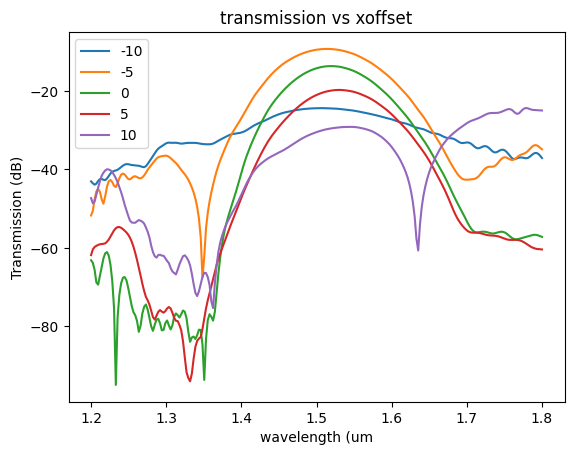

In [51]:
for offset in offsets:
    sp = gt.write_sparameters_grating_coupler(
        c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=offset
    )
    plt.plot(
        sp["wavelengths"], 20 * np.log10(np.abs(sp["o2@0,o1@0"])), label=str(offset)
    )

plt.xlabel("wavelength (um")
plt.ylabel("Transmission (dB)")
plt.title("transmission vs xoffset")
plt.legend()